 > ### First Step understand Unsupervised learning.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('Mall_Customers.csv')

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [21]:
df.shape

(250, 5)

In [22]:
# df = df.drop(columns=['Spending Score (1-100)'],axis=1)

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Show scaled data
print(scaled_data)

[[-1.72513641 -1.10108555 -1.48297002 -1.04456042 -0.41284687]
 [-1.71127989 -1.10108555 -1.33080811 -1.04456042  1.12927057]
 [-1.69742337  0.90819465 -1.40688906 -1.03159933 -1.62451058]
 ...
 [ 1.69742337 -1.10108555 -0.72216045  2.81784535  1.45972431]
 [ 1.71127989  0.90819465 -1.48297002  2.85672863 -0.66986644]
 [ 1.72513641  0.90819465 -0.56999853  2.97337846  1.31285598]]


In [24]:
kmeans = KMeans(n_clusters=3, random_state=42, )
kmeans.fit(scaled_data)

centers = kmeans.cluster_centers_
labels = kmeans.labels_
df['Cluster'] = labels

label = kmeans.predict(scaled_data)

In [25]:
print(label)

[0 0 0 0 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 2 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 2 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 2 0 0 0 2 2 2 2 0 2 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 1 0 1 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [26]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

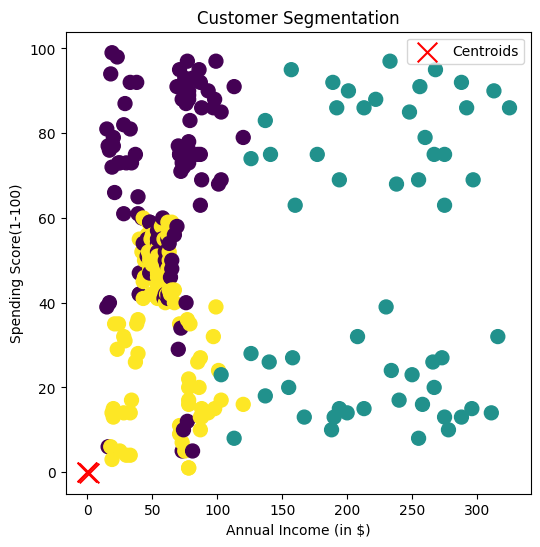

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=df['Cluster'],cmap='viridis',s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel("Annual Income (in $)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.savefig("Bishal Shrestha.pdf",format="pdf")
plt.show()